In [2]:
# This is depend on a standard distribution 

In [3]:
# z_score = (Xi - Mean)/std

In [ ]:
# If you wish to install a non-Debian-packaged Python package,
#     create a virtual environment using python3 -m venv path/to/venv.
#     Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
#     sure you have python3-full installed

In [10]:
!python3 -m venv path/to/venv

In [11]:
!path/to/venv/bin/python and path/to/venv/bin/pip

path/to/venv/bin/python: can't open file '/home/lalithrajr/Machine_learning_Practice/FEATURE_ENGINEERING/Feature Transformaiton/Missing Value Imputation/and': [Errno 2] No such file or directory


In [13]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.4.1-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cache

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

In [3]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

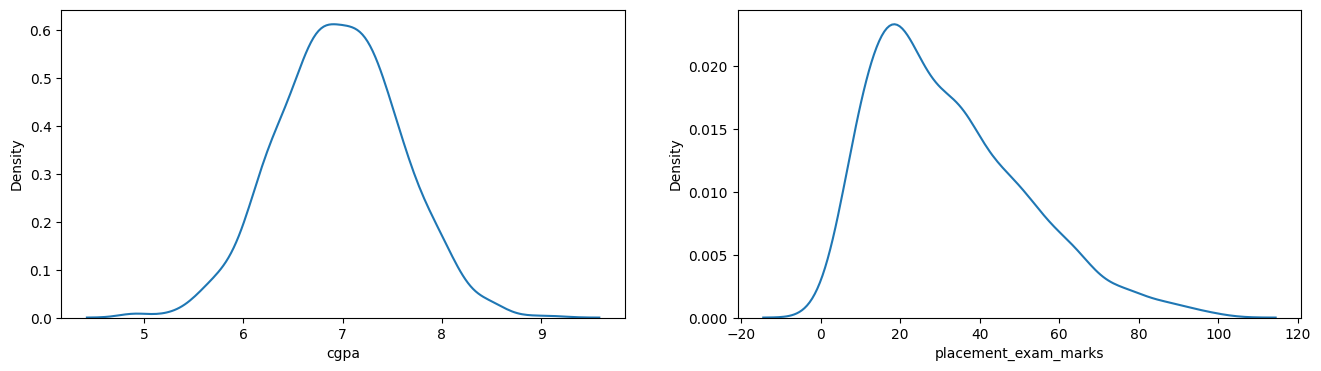

In [4]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

<B><h1>NORMALLY DISTRIBUTED DATA</h1></b>

In [5]:
# for a cgpa we need to calculate a z score or a (mean+3*std) because it fallows a normal distribution 
# for placement_exam_marks we have to use a iqr (q1-1.5*iqr)

In [6]:
df.iloc[:,:-1].describe()

,cgpa,placement_exam_marks
count,1000.000000,1000.000000
mean,6.961240,32.225000
std,0.615898,19.130822
min,4.890000,0.000000
25%,6.550000,17.000000
50%,6.960000,28.000000
75%,7.370000,44.000000
max,9.120000,100.000000


<h2>this is a z_score</h2>
<br>and there is another step directly get a value (mean + 3*std)

In [7]:
lis = []
for j in ['cgpa']:
    for i in df[j]:
        z_score = (i - np.mean(df[j]))/np.std(df[j])
        lis.append(float(z_score))

In [8]:
df['cgpa_outlier'] = lis

In [9]:
lis1 = []
for j in ['placement_exam_marks']:
    for i in df[j]:
        z_score = (i - np.mean(df[j]))/np.std(df[j])
        lis1.append(float(z_score))

In [10]:
df['placement_outlier'] = lis1

In [11]:
outlier = df[(df['cgpa_outlier']>3) | (df['cgpa_outlier']<-3)] # This are the outliers

In [12]:
outlier

,cgpa,placement_exam_marks,placed,cgpa_outlier,placement_outlier
485,4.92,44.0,1,-3.315909,0.615807
995,8.87,44.0,1,3.100701,0.615807
996,9.12,65.0,1,3.506815,1.714061
997,4.89,34.0,0,-3.364643,0.092829
999,4.90,10.0,1,-3.348398,-1.162319


<h2>direct getting value</h2>

In [13]:
positive = float(np.mean(df['cgpa'])+3*np.std(df['cgpa']))
negative = float(np.mean(df['cgpa'])-3*np.std(df['cgpa']))
positive, negative

(8.808009547507213, 5.114470452492786)

In [14]:
df[(df['cgpa']>positive) | (df['cgpa']<negative)].iloc[:,:-2]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


<h1>Trimmin</h1>

In [15]:
# remove a oulier 
df[(df['cgpa']<positive) & (df['cgpa']>negative)].iloc[:,:-2]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


<h1>Capping</h1>

In [16]:
# This is renaming a outlier value

In [49]:
lis = []
for i in df['cgpa']:
    if (i < positive) & (i > negative):
        lis.append(i)
    elif i > positive:
        lis.append(positive)
    elif i < negative:
        lis.append(negative)
# Or
#np.where(condition, true, false)
# this can be used for effecient code

In [18]:
df['cgpa'] = lis

In [19]:
df.iloc[:,:-2]

,cgpa,placement_exam_marks,placed
0,7.19000,26.0,1
1,7.46000,38.0,1
2,7.54000,40.0,1
3,6.42000,8.0,1
4,7.23000,17.0,0
...,...,...,...
995,8.80801,44.0,1
996,8.80801,65.0,1
997,5.11447,34.0,0
998,8.62000,46.0,1
